In [1]:
#note, this is a modified code which treats the vibration in the heom part, and its thermalized, see schinabeck disseration
#section 2.7.5


In [1]:
from qutip import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/neill/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['info', 'squeeze', 'entropy', 'identity', 'shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
%load_ext autoreload
%autoreload 2

In [40]:
import heom_fermions_1 as heom_fermions
import heom_fermions_1_SSboundary as heom_fermions_bound

import heom_fermions_1_SSboundary_optimize as heom_fermions_bound

In [4]:
def deltafun(j,k):
    if j==k: 
        return 1.
    else:
        return 0.

In [5]:

from scipy.integrate import quad
import scipy as scipy

In [25]:
K

63

In [27]:
len([2]*(K*4))

252

In [35]:
nstates, state2idx, idx2state =enr_state_dictionaries([2]*(2*4) ,1)

In [36]:
aux_indices2=[]
aux_heom_indices2= []
for stateid in state2idx:
        
        if np.sum(stateid) == 1:
            print(stateid)
            aux_indices2.append(state2idx[stateid])
            aux_heom_indices2.append(stateid)

(0, 0, 0, 0, 0, 0, 0, 1)
(0, 0, 0, 0, 0, 0, 1, 0)
(0, 0, 0, 0, 0, 1, 0, 0)
(0, 0, 0, 0, 1, 0, 0, 0)
(0, 0, 0, 1, 0, 0, 0, 0)
(0, 0, 1, 0, 0, 0, 0, 0)
(0, 1, 0, 0, 0, 0, 0, 0)
(1, 0, 0, 0, 0, 0, 0, 0)


In [32]:
idx2state

{0: (0, 0, 0, 0, 0, 0, 0, 0),
 1: (0, 0, 0, 0, 0, 0, 0, 1),
 2: (0, 0, 0, 0, 0, 0, 1, 0),
 3: (0, 0, 0, 0, 0, 0, 1, 1),
 4: (0, 0, 0, 0, 0, 1, 0, 0),
 5: (0, 0, 0, 0, 0, 1, 0, 1),
 6: (0, 0, 0, 0, 0, 1, 1, 0),
 7: (0, 0, 0, 0, 1, 0, 0, 0),
 8: (0, 0, 0, 0, 1, 0, 0, 1),
 9: (0, 0, 0, 0, 1, 0, 1, 0),
 10: (0, 0, 0, 0, 1, 1, 0, 0),
 11: (0, 0, 0, 1, 0, 0, 0, 0),
 12: (0, 0, 0, 1, 0, 0, 0, 1),
 13: (0, 0, 0, 1, 0, 0, 1, 0),
 14: (0, 0, 0, 1, 0, 1, 0, 0),
 15: (0, 0, 0, 1, 1, 0, 0, 0),
 16: (0, 0, 1, 0, 0, 0, 0, 0),
 17: (0, 0, 1, 0, 0, 0, 0, 1),
 18: (0, 0, 1, 0, 0, 0, 1, 0),
 19: (0, 0, 1, 0, 0, 1, 0, 0),
 20: (0, 0, 1, 0, 1, 0, 0, 0),
 21: (0, 0, 1, 1, 0, 0, 0, 0),
 22: (0, 1, 0, 0, 0, 0, 0, 0),
 23: (0, 1, 0, 0, 0, 0, 0, 1),
 24: (0, 1, 0, 0, 0, 0, 1, 0),
 25: (0, 1, 0, 0, 0, 1, 0, 0),
 26: (0, 1, 0, 0, 1, 0, 0, 0),
 27: (0, 1, 0, 1, 0, 0, 0, 0),
 28: (0, 1, 1, 0, 0, 0, 0, 0),
 29: (1, 0, 0, 0, 0, 0, 0, 0),
 30: (1, 0, 0, 0, 0, 0, 0, 1),
 31: (1, 0, 0, 0, 0, 0, 1, 0),
 32: (1, 0, 0, 0, 

In [6]:
#I need to add Ncc back in, which i do here:
from qutip.states import enr_state_dictionaries

def get_aux_matrices(full, level, N_baths, Nk, N_cut):
    """
    Extracts the auxiliary matrices at a particular level
    from the full hierarchy ADOs.
    
    Parameters
    ----------
    full: ndarray
        A 2D array of the time evolution of the ADOs.
    
    level: int
        The level of the hierarchy to get the ADOs.
        
    Nc: int
        The hierarchy cutoff.
    
    k: int
        The total number of exponentials used to express the correlation.
    """
    #Note: Max N_cut is Nk*N_baths
    nstates, state2idx, idx2state =enr_state_dictionaries([2]*(Nk*N_baths) ,N_cut)#_heom_state_dictionaries([Nc + 1]*(Nk), Nc)
    aux_indices = []
    
    aux_heom_indices = []
    for stateid in state2idx:
        if np.sum(stateid) == level:
            aux_indices.append(state2idx[stateid])
            aux_heom_indices.append(stateid)
    full = np.array(full)
    aux = []

    for i in aux_indices:
        #qlist = [Qobj(full[k, i, :].reshape(2*Nbos, 2*Nbos).T,dims=d1.dims) for k in range(len(full))]
        qlist = [Qobj(full[k, i, :].reshape(2, 2).T,dims=d1.dims) for k in range(len(full))]
        aux.append(qlist)
    return aux, aux_heom_indices, idx2state

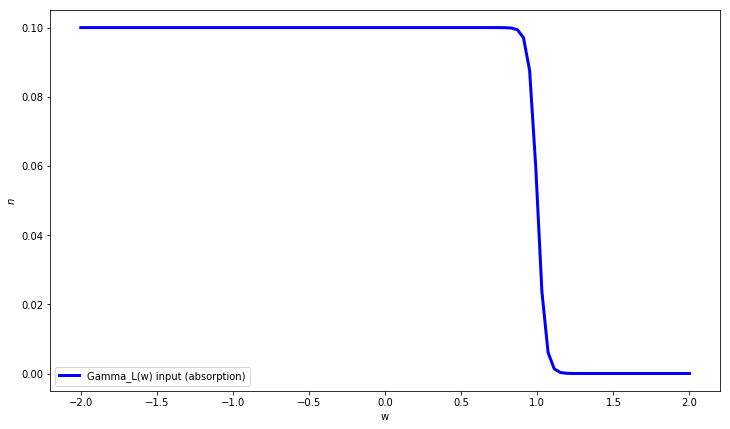

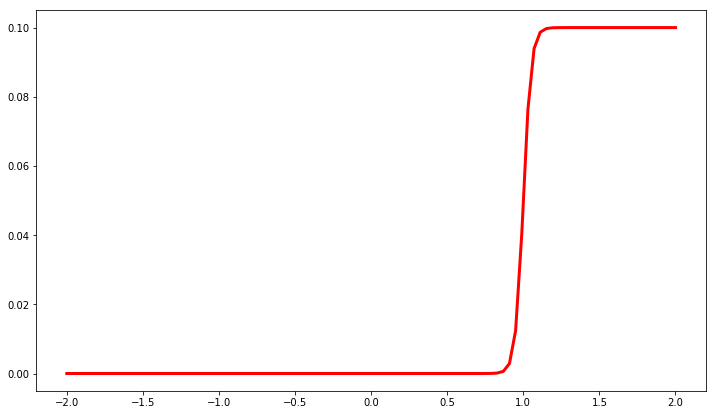

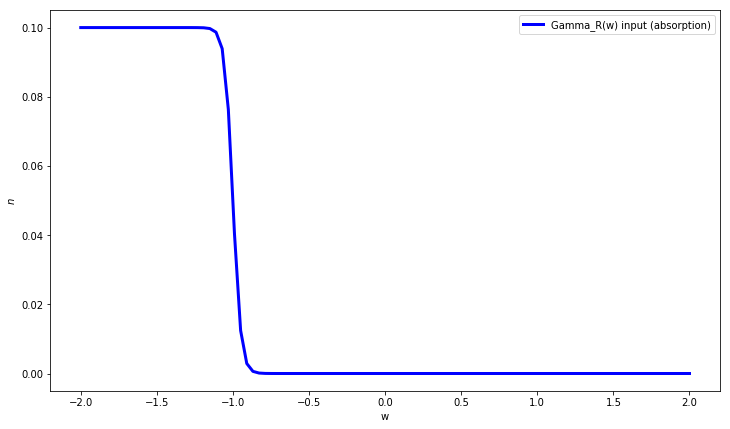

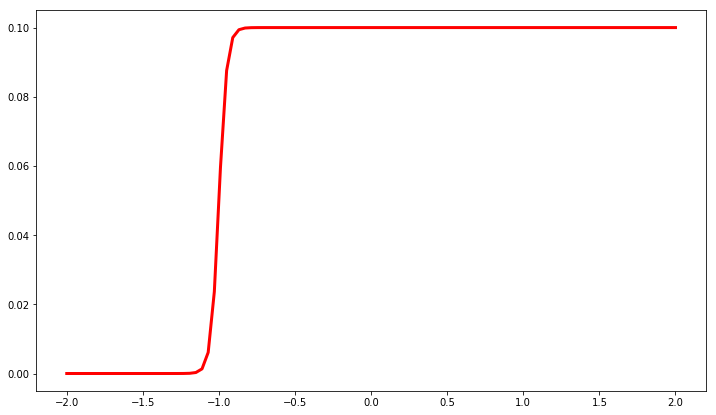

In [7]:
#parameters and spectra check

#thoss
#1a
#Gamma = 0.01
#1c
Gamma = 0.1
#phillip
#Gamma =10

W = 10**4
#phillip
#W=0.1
#pade paper
#Gamma = 1.
#W=1.
 
#T = 300
T = 0.025851991 #in ev
beta = 1./T

theta = 2.
mu_l = theta/2.
mu_r = -theta/2.

w_list = np.linspace(-2,2,100)

def Gamma_L_w(w):
    return Gamma*W**2/((w-mu_l)**2 + W**2)

def Gamma_R_w(w):
    return Gamma*W**2/((w-mu_r)**2 + W**2)


def f(x):
    kB=1.
    return 1/(exp(x)+1.)
def f2(x):
    return 0.5

fig, ax1 = plt.subplots(figsize=(12, 7))
gam_list_in = [Gamma_L_w(w)*f(beta*(w-mu_l)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_L(w) input (absorption)")

#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()
fig, ax2 = plt.subplots(figsize=(12, 7))
#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_L_w(w)*f(-beta*(w-mu_l)) for w in w_list]
spec = [Gamma_L_w(w) for w in w_list]
#print(gam_list)
ax2.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_L(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")

fig, ax1 = plt.subplots(figsize=(12, 7))
gam_list_in = [Gamma_R_w(w)*f(beta*(w-mu_r)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_R(w) input (absorption)")

#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()
fig, ax2 = plt.subplots(figsize=(12, 7))
#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_R_w(w)*f(-beta*(w-mu_r)) for w in w_list]
spec = [Gamma_R_w(w) for w in w_list]
#print(gam_list)
ax2.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_R(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")


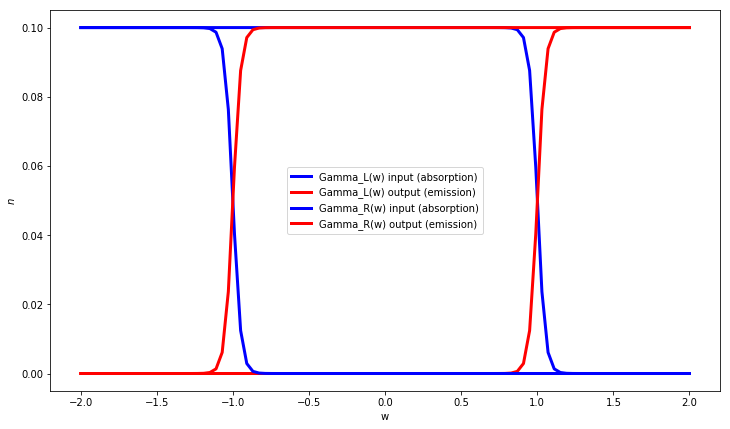

In [8]:

fig, ax1 = plt.subplots(figsize=(12, 7))
gam_list_in = [Gamma_L_w(w)*f(beta*(w-mu_l)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_L(w) input (absorption)")

#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()

#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_L_w(w)*f(-beta*(w-mu_l)) for w in w_list]
spec = [Gamma_L_w(w) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_L(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")

gam_list_in = [Gamma_R_w(w)*f(beta*(w-mu_r)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_R(w) input (absorption)")



#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_R_w(w)*f(-beta*(w-mu_r)) for w in w_list]
spec = [Gamma_R_w(w) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_R(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")
#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()

In [9]:
#construct phonon correlation function. lets test it!
from scipy.special import iv
#scipy.special.iv(v, z) 
Omega = 0.2
Lambda = 0.4
def n_bos(x):
    return 1./(exp(x)-1.)

Nth = n_bos(beta*Omega)


def c_bos(t):
    return exp(-(Lambda**2/Omega**2) *( (1+Nth) * (1-exp(-1.0j*Omega*t)) +Nth*(1-exp(1.0j*Omega*t))))

def A(u):
    return exp(-(Lambda**2/Omega**2) * (2*Nth + 1)) * ((Nth+1)/Nth)**(u/2.) * iv(abs(u),2*(Lambda**2/Omega**2)*sqrt(Nth*(Nth+1)))
    

def c_bos2(t,sigma):
    c_temp=0.
    a_list = []
    om_list = []
    for u in range(-umax, umax+1):
        #print(u)
        
        c_temp+= A(sigma*u)*exp(-1.0j*sigma*u*Omega*t)
        a_list.append(A(sigma*u))
        om_list.append(1.0j*sigma*u*Omega)
    return c_temp,a_list,om_list


        


In [10]:
umax=4
c_bos2(0,1)

((0.6287686974948405+0j),
 [7.10045180774267e-15,
  1.625928152338735e-11,
  2.79305257428066e-08,
  3.200503152894174e-05,
  0.018379593101584827,
  0.07329452334576846,
  0.14648246565201353,
  0.1952815201867457,
  0.195298562230407],
 [-0.8j,
  -0.6000000000000001j,
  -0.4j,
  -0.2j,
  0j,
  0.2j,
  0.4j,
  0.6000000000000001j,
  0.8j])

/home/neill/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


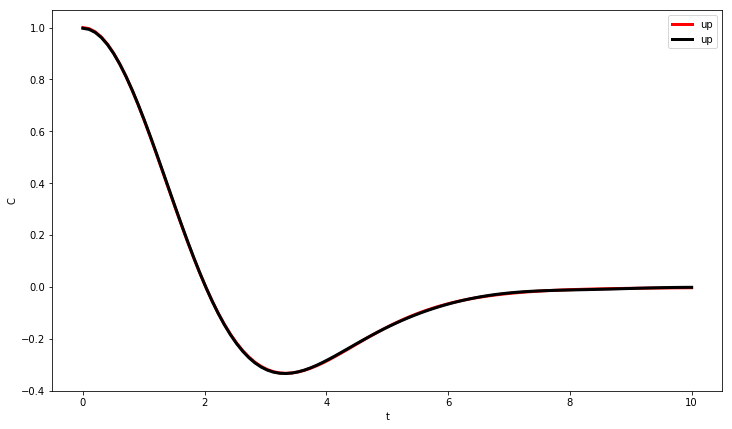

In [11]:
fig, ax1 = plt.subplots(figsize=(12, 7))
#
umax = 10
tlist = linspace(0,10,100)
ax1.plot(tlist,[c_bos(t) for t in tlist], color="red", linewidth=3, label= r"up")
ax1.plot(tlist,[c_bos2(t,1)[0] for t in tlist], color="black", linewidth=3, label= r"up")
    
    
    #ax1.set_ylim(0, 1)
ax1.set_xlabel("t")
ax1.set_ylabel(r"C")
ax1.legend()


In [3]:
import numpy as np


In [7]:
theta_list = np.linspace(0,1,25)
np.real(theta_list)

[0.         0.04166667 0.08333333 0.125      0.16666667 0.20833333
 0.25       0.29166667 0.33333333 0.375      0.41666667 0.45833333
 0.5        0.54166667 0.58333333 0.625      0.66666667 0.70833333
 0.75       0.79166667 0.83333333 0.875      0.91666667 0.95833333
 1.        ]


In [8]:
np.real(theta_list)

array([0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
       0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
       0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
       0.625     , 0.66666667, 0.70833333, 0.75      , 0.79166667,
       0.83333333, 0.875     , 0.91666667, 0.95833333, 1.        ])

In [41]:
#Try integrable 2-bath model
#here I use paramaers from phillips paper
#this collates pade parameters

rhoHssPlistl10u10n1 = []
fullssPlistl10u10n1 = []
theta_list = np.linspace(0,1,25)

for theta in theta_list:
    print("------------- theta:",theta)
    mu_l = theta/2.
    mu_r = -theta/2.


    tlist = np.linspace(0,0.001,100)



    lmax = 10



    #beta = 1./T
    #beta = np.inf

    w_list = np.linspace(-2,2,100)

    def Gamma_L_w(w):
        return Gamma*W**2/((w-mu_l)**2 + W**2)

    def Gamma_w(w, mu):
        return Gamma*W**2/((w-mu)**2 + W**2)


    def f(x):
        kB=1.
        return 1/(exp(x)+1.)





    #Next compare pade decomp to numerical integration

    Alpha =np.zeros((2*lmax,2*lmax))
    for j in range(2*lmax):
        for k in range(2*lmax):
            Alpha[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)-1)*(2*(k+1)-1))

    eigvalsA=eigvalsh(Alpha)  

    eps = []
    for val in  eigvalsA[0:lmax]:
        #print(-2/val)
        eps.append(-2/val)


    AlphaP =np.zeros((2*lmax-1,2*lmax-1))
    for j in range(2*lmax-1):
        for k in range(2*lmax-1):
            AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)+1)*(2*(k+1)+1))
            #AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+2)-1)*(2*(k+2)-1))

    eigvalsAP=eigvalsh(AlphaP)    


    chi = []
    for val in  eigvalsAP[0:lmax-1]:
        #print(-2/val)
        chi.append(-2/val)


    eta_list=[0.5*lmax*(2*(lmax + 1) - 1)*( 
      np.prod([chi[k]**2 - eps[j]**2 for k in range(lmax - 1)])/
        np.prod([eps[k]**2 - eps[j]**2 +deltafun(j,k) for k in range(lmax)])) 
              for j in range(lmax)]


    #kappa = [0,1,1,1.56,14.44]
    kappa = [0]+eta_list
    print(kappa)
    #epsilon = [0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi]
    #print([0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi])
    epsilon = [0]+eps
    print(epsilon)
    def f_approx(x):
        f = 0.5
        for l in range(1,lmax+1):
            f= f - 2*kappa[l]*x/(x**2+epsilon[l]**2)
        return f

    def f(x):
        kB=1.
        return 1/(exp(x)+1.)



    #######

    #####HERE I SET LMAX 0, and comment out hte pade stuff... lets just try with one exponent!!!!

    #now lets try switching it on. urgh.

    #lmax =2

    def C(tlist,sigma,mu):
        eta_list = []
        gamma_list  =[]

        #l = 0
        eta_0 = 0.5*Gamma*W*f_approx(1.0j*beta*W)
        #eta_0 = 0.5*Gamma*W*f(1.0j*beta*W)
        gamma_0 = W - sigma*1.0j*mu
        eta_list.append(eta_0)
        gamma_list.append(gamma_0)
        if lmax>0:
            for l in range(1,lmax+1):
                eta_list.append(-1.0j*(kappa[l]/beta)*Gamma*W**2/(-(epsilon[l]**2/beta**2)+W**2))
                gamma_list.append(epsilon[l]/beta - sigma*1.0j*mu)
        c_tot = []
        for t in tlist:
            c_tot.append(sum([eta_list[l]*exp(-gamma_list[l]*t) for l in range(lmax+1)]))
        return c_tot, eta_list, gamma_list


    #sigma = -  is dsetroy in environment create electron in system


    def c_t_L_num(t,sigma,mu):

        integrand = lambda w: (1/(2*pi))*exp(sigma*1.0j*w*t)*Gamma_w(w,mu)*f(sigma*beta*(w-mu))
        def real_func(x):
            return scipy.real(integrand(x))
        def imag_func(x):
            return scipy.imag(integrand(x))
        #return quad(integrand,-np.inf,np.inf)[0]
        #a= -600000
        #b = 600000

        a= -10**6
        b=10**6
        real_integral = quad(real_func, a, b)
        imag_integral = quad(imag_func, a, b)
        return real_integral[0] + 1.0j * imag_integral[0]


    #tlist = np.linspace(0,1e-3,100)


    cppL,etapL,gampL = C(tlist,1.0,mu_l)

    cpmL,etamL,gammL = C(tlist,-1.0,mu_l)

    #mu_r = -mu_l

    cppR,etapR,gampR = C(tlist,1.0,mu_r)

    cpmR,etamR,gammR = C(tlist,-1.0,mu_r)

    #heom simu on above params (Pade)

    #try and do thos proper model


    d1 = destroy(2)



    #e1 = 0.3 #d1 = spin up
    #renormed from polaron
    e1 = 0.25 #d1 = spin up
    Omega = 0.2
    Lambda = 0.4

    H0 = e1*d1.dag()*d1 

    #Qops = [d1,d1.dag()]
    Qops = [d1.dag(),d1,d1.dag(),d1]


    rho_0 = basis(2,0)*basis(2,0).dag()
    
    umax = 10
    Kk=(lmax+1)*(2*umax+1)
    Ncc=2*2
    Ncc=2*4
    Ncc = 4*Kk
    Ncc = 1
    tlist = np.linspace(0,100,1000)
    print(0)
    A_listp=c_bos2(0,1)[1]
    print(A_listp)
    om_listp=c_bos2(0,1)[2]
    print(0)
    print(om_listp)
    A_listm=c_bos2(0,-1)[1]
    om_listm=c_bos2(0,-1)[2]
    #print(etapR)
    
    #eta_list = [etapR * xx for xx in A_listp] + [etamR * xx for xx in A_listm] + [etapL * xx for xx in A_listp] + [etamL * xx for xx in A_listm]
    #eta_list = [x*y for x in etapR  for y in A_listp] + [x*y for x in etamR  for y in A_listm] + [x*y for x in etapL  for y in A_listp] + [x*y for x in etamL  for y in A_listm]
    eta_list = [[x*y for x in etapR  for y in A_listp], [x*y for x in etamR  for y in A_listm], [x*y for x in etapL  for y in A_listp], [x*y for x in etamL  for y in A_listm]]

    #T=0:
    #eta_list = [[Gamma*W/2.],[0.]]
    #eta_list = [[0.],[Gamma*W/2.]]
    #print(eta_list)
    #gamma_list = [gampR + x for x in om_listp] + [gammR+x for x in om_listm]+[gampL+ x for x in om_listp]+[gammL+ x for x in om_listm]
    gamma_list = [[x+y for x in gampR  for y in om_listp] , [x+y for x in gammR  for y in om_listm],[x+y for x in gampL  for y in om_listp],[x+y for x in gammL  for y in om_listm]]
    #print(gamma_list)
    import time
    start = time.time()
    #resultHEOM1=heom_fermions.HSolverFermions(H0, [], Qops,  eta_list, gamma_list,  Ncc, Kk,renorm=False,bnd_cut_approx=False)
    resultHEOM1=heom_fermions_bound.HSolverFermions(H0, [], Qops,  eta_list, gamma_list,  Ncc, Kk,renorm=False,bnd_cut_approx=False)
    end = time.time()
    print("construct time:", end - start)

    #start = time.time()
    #out1P,full1P=resultHEOM1.run(rho_0,tlist)
    #end = time.time()
    #print(end - start)

    start = time.time()

    rhossHP,fullssP=resultHEOM1.ss(rho_0,H0)
    end = time.time()
    print("ss time",end - start)
    rhoHssPlistl10u10n1.append(rhossHP)
    fullssPlistl10u10n1.append(fullssP)
    #Pg1 = expect(out1.states,sz)
    #Pgg1 = expect(out1.states,sm*sm.dag())
    #1mev = 1.51926741 × 10^12 hertz 


    #fig, ax1 = plt.subplots(figsize=(12, 7))

    #ax1.plot(tlist,expect(out1P.states,basis(2,1)*basis(2,1).dag()), color="black", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.set_ylim(0, 1)
    #ax1.set_xlabel("t")
    #ax1.set_ylabel(r"pop")
    #ax1.legend()


------------- theta: 0.0
[0, 0.9999999999999862, 0.9999999999999868, 1.0000000000012206, 1.0000001690305604, 1.0003807129102773, 1.0439710525567194, 1.5305316265017264, 3.2018172059815946, 9.279187642797012, 84.94411159022091]
[0, 3.141592653589793, 9.424777960769381, 15.707963267949479, 21.991148682663308, 28.274698131942646, 34.62641555503289, 42.3031405780699, 56.25248560357533, 90.71566976800949, 267.89788247787743]
0
[1.3359229316168807e-36, 7.645618129954495e-33, 3.938151727177783e-29, 1.8031348094284043e-25, 7.224105029678759e-22, 2.4809110084756872e-18, 7.10045180774267e-15, 1.625928152338735e-11, 2.79305257428066e-08, 3.200503152894174e-05, 0.018379593101584827, 0.07329452334576846, 0.14648246565201353, 0.1952815201867457, 0.195298562230407, 0.1562706841961669, 0.10420861991805043, 0.05956635917538749, 0.02979329715886841, 0.013246220867802208, 0.005300466079781793]
0
[-2j, -1.8j, -1.6j, -1.4000000000000001j, -1.2000000000000002j, -1j, -0.8j, -0.6000000000000001j, -0.4j, -0.2j

20.0%. Run time: 398.20s. Est. time left: 00:00:26:32
30.1%. Run time: 592.69s. Est. time left: 00:00:22:59
40.0%. Run time: 788.93s. Est. time left: 00:00:19:43
50.1%. Run time: 983.04s. Est. time left: 00:00:16:20
60.0%. Run time: 1175.96s. Est. time left: 00:00:13:03
70.1%. Run time: 1373.72s. Est. time left: 00:00:09:47
80.0%. Run time: 1564.12s. Est. time left: 00:00:06:31
90.1%. Run time: 1756.25s. Est. time left: 00:00:03:13
100.0%. Run time: 1944.93s. Est. time left: 00:00:00:00
Total run time: 1944.98s
construct time: 2023.4134185314178
ss time 0.7366306781768799
------------- theta: 0.20833333333333331
[0, 0.9999999999999862, 0.9999999999999868, 1.0000000000012206, 1.0000001690305604, 1.0003807129102773, 1.0439710525567194, 1.5305316265017264, 3.2018172059815946, 9.279187642797012, 84.94411159022091]
[0, 3.141592653589793, 9.424777960769381, 15.707963267949479, 21.991148682663308, 28.274698131942646, 34.62641555503289, 42.3031405780699, 56.25248560357533, 90.71566976800949, 2

925
6
10.1%. Run time: 208.38s. Est. time left: 00:00:31:04
20.0%. Run time: 404.37s. Est. time left: 00:00:26:57
30.1%. Run time: 601.83s. Est. time left: 00:00:23:20
40.0%. Run time: 796.71s. Est. time left: 00:00:19:55
50.1%. Run time: 994.02s. Est. time left: 00:00:16:31
60.0%. Run time: 1188.29s. Est. time left: 00:00:13:12
70.1%. Run time: 1385.25s. Est. time left: 00:00:09:52
80.0%. Run time: 1579.56s. Est. time left: 00:00:06:34
90.1%. Run time: 1775.18s. Est. time left: 00:00:03:16
100.0%. Run time: 1968.84s. Est. time left: 00:00:00:00
Total run time: 1968.89s
construct time: 2048.111531972885
ss time 1.1712348461151123
------------- theta: 0.41666666666666663
[0, 0.9999999999999862, 0.9999999999999868, 1.0000000000012206, 1.0000001690305604, 1.0003807129102773, 1.0439710525567194, 1.5305316265017264, 3.2018172059815946, 9.279187642797012, 84.94411159022091]
[0, 3.141592653589793, 9.424777960769381, 15.707963267949479, 21.991148682663308, 28.274698131942646, 34.62641555503289

925
6
10.1%. Run time: 254.86s. Est. time left: 00:00:37:59
20.0%. Run time: 496.51s. Est. time left: 00:00:33:06
30.1%. Run time: 740.84s. Est. time left: 00:00:28:44
40.0%. Run time: 980.56s. Est. time left: 00:00:24:30
50.1%. Run time: 1216.12s. Est. time left: 00:00:20:13
60.0%. Run time: 1454.23s. Est. time left: 00:00:16:09
70.1%. Run time: 1697.06s. Est. time left: 00:00:12:05
80.0%. Run time: 1935.51s. Est. time left: 00:00:08:03
90.1%. Run time: 2174.11s. Est. time left: 00:00:04:00
100.0%. Run time: 2405.23s. Est. time left: 00:00:00:00
Total run time: 2405.30s
construct time: 2490.6060523986816
ss time 0.804847240447998
------------- theta: 0.625
[0, 0.9999999999999862, 0.9999999999999868, 1.0000000000012206, 1.0000001690305604, 1.0003807129102773, 1.0439710525567194, 1.5305316265017264, 3.2018172059815946, 9.279187642797012, 84.94411159022091]
[0, 3.141592653589793, 9.424777960769381, 15.707963267949479, 21.991148682663308, 28.274698131942646, 34.62641555503289, 42.30314057

925
6
10.1%. Run time: 251.49s. Est. time left: 00:00:37:29
20.0%. Run time: 487.99s. Est. time left: 00:00:32:31
30.1%. Run time: 719.89s. Est. time left: 00:00:27:55
40.0%. Run time: 958.71s. Est. time left: 00:00:23:58
50.1%. Run time: 1200.77s. Est. time left: 00:00:19:58
60.0%. Run time: 1438.31s. Est. time left: 00:00:15:58
70.1%. Run time: 1677.62s. Est. time left: 00:00:11:57
80.0%. Run time: 1909.01s. Est. time left: 00:00:07:57
90.1%. Run time: 2146.92s. Est. time left: 00:00:03:57
100.0%. Run time: 2383.94s. Est. time left: 00:00:00:00
Total run time: 2384.03s
construct time: 2471.333868741989
ss time 1.18827486038208
------------- theta: 0.8333333333333333
[0, 0.9999999999999862, 0.9999999999999868, 1.0000000000012206, 1.0000001690305604, 1.0003807129102773, 1.0439710525567194, 1.5305316265017264, 3.2018172059815946, 9.279187642797012, 84.94411159022091]
[0, 3.141592653589793, 9.424777960769381, 15.707963267949479, 21.991148682663308, 28.274698131942646, 34.62641555503289, 

925
6
10.1%. Run time: 242.02s. Est. time left: 00:00:36:05
20.0%. Run time: 476.13s. Est. time left: 00:00:31:44
30.1%. Run time: 713.89s. Est. time left: 00:00:27:41
40.0%. Run time: 948.04s. Est. time left: 00:00:23:42
50.1%. Run time: 1186.32s. Est. time left: 00:00:19:43
60.0%. Run time: 1420.62s. Est. time left: 00:00:15:47
70.1%. Run time: 1650.66s. Est. time left: 00:00:11:45
80.0%. Run time: 1886.85s. Est. time left: 00:00:07:51
90.1%. Run time: 2125.22s. Est. time left: 00:00:03:54
100.0%. Run time: 2359.34s. Est. time left: 00:00:00:00
Total run time: 2359.36s
construct time: 2442.8066778182983
ss time 1.2010250091552734


In [16]:
aux_1_list[0][0]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 0.00000000e+00+0.00000000e+00j -2.01391685e-06-1.08088422e-05j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]]

In [42]:
#I need to generelize this a b it better

aux_1_list_list=[]
aux1_indices_list=[]
aux_2_list_list=[]
aux2_indices_list=[]

#for kk,lam in enumerate(lamlist):
K = Kk  #this is not kk (Ihope)


#aux_1_list, aux1_indices = get_aux_matrices([fullss], 1, 4, K)
#aux_2_list, aux2_indices = get_aux_matrices([fullss], 2, 4, K)

aux_1_list, aux1_indices, idx2state = get_aux_matrices(fullssPlistl10u10n1, 1, 4, K, Ncc)
aux_2_list, aux2_indices, idx2state = get_aux_matrices(fullssPlistl10u10n1, 2, 4, K, Ncc)


#d1 = tensor(destroy(2), qeye(Nbos))   #Kk to 2*Kk
d1 =destroy(2)
#currP = [0.0]+[-1.0j * ((d1*(sum([aux_1_list[gg][t] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][t] for gg in range(Kk)]))).tr()) for t in range(999)]
#currP = [-1.0j * ((d1*(sum([aux_1_list[gg][thet] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][thet] for gg in range(Kk)]))).tr()) for thet, thet2 in enumerate(theta_list)]
#currPl9u10n1 = [1.0j * ((d1*(sum([aux_1_list[gg][thet] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][thet] for gg in range(Kk)]))).tr()) for thet, thet2 in enumerate(theta_list)]
currPl10u10n1 = [1.0j * (((sum([(d1*aux_1_list[gg][thet]).tr() for gg in range(Kk,2*Kk)]))) - ((sum([(d1.dag()*aux_1_list[gg][thet]).tr() for gg in range(Kk)])))) for thet, thet2 in enumerate(theta_list)]

In [21]:
aux_1_list[1][0]+aux_1_list[2][0]  

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 0.        +0.j         -0.00122269-0.00041406j]
 [ 0.        +0.j          0.        +0.j        ]]

In [22]:
currPl2u10n1 = [1.0j * (((sum([(d1*aux_1_list[gg][thet]).tr() for gg in range(Kk,2*Kk)]))) - ((sum([(d1.dag()*aux_1_list[gg][thet]).tr() for gg in range(Kk)])))) for thet, thet2 in enumerate(theta_list)]

In [43]:
#d1 =destroy(2)
#currP = [0.0]+[-1.0j * ((d1*(sum([aux_1_list[gg][t] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][t] for gg in range(Kk)]))).tr()) for t in range(999)]
#currP = [-1.0j * ((d1*(sum([aux_1_list[gg][thet] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][thet] for gg in range(Kk)]))).tr()) for thet, thet2 in enumerate(theta_list)]
#currPl5u2n2 = [1.0j * ((d1*(sum([aux_1_list[gg][thet] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][thet] for gg in range(Kk)]))).tr()) for thet, thet2 in enumerate(theta_list)]
currPunitsl10u10n1 = [curr*2.434e-4*1e6 for curr in currPl10u10n1]

In [1]:
real(currPunitsl9u10n1)

NameError: name 'real' is not defined

In [22]:
real(currPunitsl9u10n1)

array([-5.91124372e-15,  9.87515633e-05,  2.94450517e-04,  7.52055220e-04,
        1.82462658e-03,  4.20822417e-03,  9.16960793e-03,  1.91159621e-02,
        3.83870318e-02,  7.26155412e-02,  1.24243004e-01,  1.87101495e-01,
        2.48708140e-01,  2.99690643e-01,  3.40158541e-01,  3.77666953e-01,
        4.22200065e-01,  4.85204952e-01,  5.80501974e-01,  7.18638781e-01,
        8.94484505e-01,  1.08444711e+00,  1.26066906e+00,  1.40824501e+00,
        1.53196554e+00])

In [45]:
currPunitsl9u10n1=[-5.91124372e-15,  9.87515633e-05,  2.94450517e-04,  7.52055220e-04,
        1.82462658e-03,  4.20822417e-03,  9.16960793e-03,  1.91159621e-02,
        3.83870318e-02,  7.26155412e-02,  1.24243004e-01,  1.87101495e-01,
        2.48708140e-01,  2.99690643e-01,  3.40158541e-01,  3.77666953e-01,
        4.22200065e-01,  4.85204952e-01,  5.80501974e-01,  7.18638781e-01,
        8.94484505e-01,  1.08444711e+00,  1.26066906e+00,  1.40824501e+00,
        1.53196554e+00]

In [16]:
currPunitsl7u10n1=[0.00000000e+00, 3.10110968e-04, 7.00701630e-04, 1.23251853e-03,
       2.15953457e-03, 4.20093060e-03, 8.73359638e-03, 1.82590880e-02,
       3.71348644e-02, 7.09438816e-02, 1.22041051e-01, 1.84180228e-01,
       2.44901517e-01, 2.94964194e-01, 3.34598572e-01, 3.71402173e-01,
       4.15352568e-01, 4.77863175e-01, 5.72667480e-01, 7.10139508e-01,
       8.84935416e-01, 1.07338738e+00, 1.24782963e+00, 1.39369055e+00,
       1.51598084e+00]

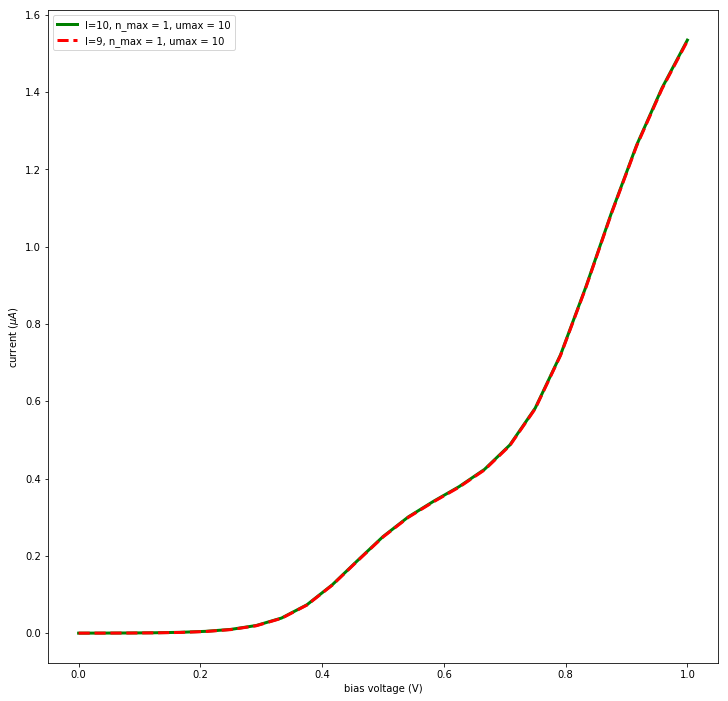

In [46]:


fig, ax1 = plt.subplots(figsize=(12, 12))


#ax1.plot(theta_list,currPunitsl5u2n2 , "b", linewidth=3, label= r"l=5, n_max = 2, umax = 2")
#ax1.plot(theta_list,currPunitsl6u2n2 , "g--", linewidth=3, label= r"l=6, n_max = 2, umax = 2")
#ax1.plot(theta_list,currPunitsl5u3n1 , "r--", linewidth=3, label= r"l=5, n_max = 1, umax = 5")
#ax1.plot(theta_list,currPunitsl5u5n1 , "r-", linewidth=3, label= r"l=5, n_max = 1, umax = 5")
#ax1.plot(theta_list,currPunitsl6u5n1 , "g--", linewidth=3, label= r"l=6, n_max = 1, umax = 5")
#ax1.plot(theta_list,currPunitsl7u5n1 , "b--", linewidth=3, label= r"l=7, n_max = 1, umax = 5")
#ax1.plot(theta_list,currPunitsl7u6n1 , "y--", linewidth=3, label= r"l=7, n_max = 1, umax = 6")
#ax1.plot(theta_list,currPunitsl7u10n1 , "r--", linewidth=3, label= r"l=7, n_max = 1, umax = 10")
ax1.plot(theta_list,currPunitsl10u10n1 , "g", linewidth=3, label= r"l=10, n_max = 1, umax = 10")
ax1.plot(theta_list,currPunitsl9u10n1 , "r--", linewidth=3, label= r"l=9, n_max = 1, umax = 10")


ax1.set_xlabel("bias voltage (V)")
ax1.set_ylabel(r"current ($\mu A$)")
ax1.legend()
#plt.ylim(0, 1.75)
#plt.savefig("fig1d_therm.pdf")

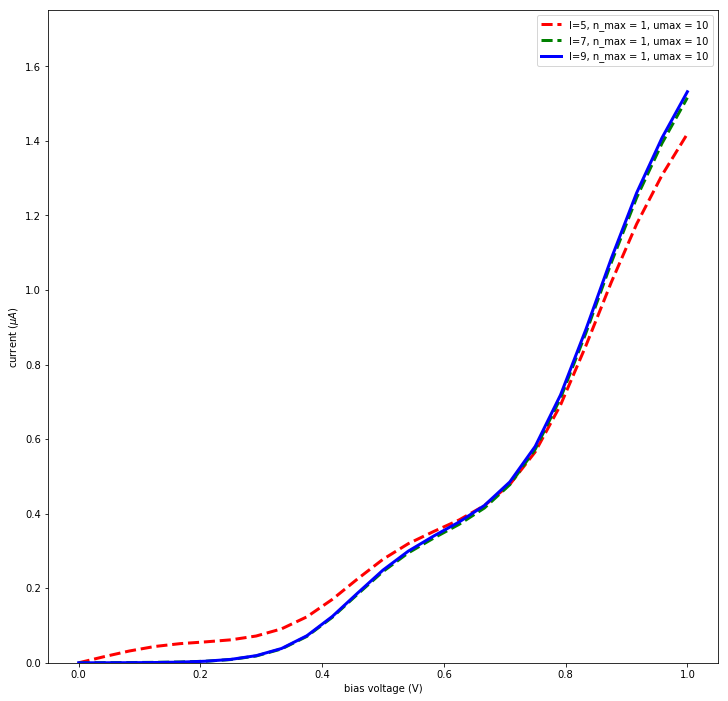

In [21]:


fig, ax1 = plt.subplots(figsize=(12, 12))


#ax1.plot(theta_list,currPunitsl5u2n2 , "b", linewidth=3, label= r"l=5, n_max = 2, umax = 2")
#ax1.plot(theta_list,currPunitsl6u2n2 , "g--", linewidth=3, label= r"l=6, n_max = 2, umax = 2")
#ax1.plot(theta_list,currPunitsl5u3n1 , "r--", linewidth=3, label= r"l=5, n_max = 1, umax = 5")
#ax1.plot(theta_list,currPunitsl5u5n1 , "r-", linewidth=3, label= r"l=5, n_max = 1, umax = 5")
#ax1.plot(theta_list,currPunitsl6u5n1 , "g--", linewidth=3, label= r"l=6, n_max = 1, umax = 5")
#ax1.plot(theta_list,currPunitsl7u5n1 , "b--", linewidth=3, label= r"l=7, n_max = 1, umax = 5")
#ax1.plot(theta_list,currPunitsl7u6n1 , "y--", linewidth=3, label= r"l=7, n_max = 1, umax = 6")

ax1.plot(theta_list,currPunitsl5u10n1 , "r--", linewidth=3, label= r"l=5, n_max = 1, umax = 10")
ax1.plot(theta_list,currPunitsl7u10n1 , "g--", linewidth=3, label= r"l=7, n_max = 1, umax = 10")


ax1.plot(theta_list,currPunitsl9u10n1 , "b", linewidth=3, label= r"l=9, n_max = 1, umax = 10")

ax1.set_xlabel("bias voltage (V)")
ax1.set_ylabel(r"current ($\mu A$)")
ax1.legend()
plt.ylim(0, 1.75)
plt.savefig("fig1d_therm.pdf")

In [23]:
qutip.about()



QuTiP: Quantum Toolbox in Python
Copyright (c) 2011 and later.
A. J. Pitchford, P. D. Nation, R. J. Johansson, A. Grimsmo, and C. Granade

QuTiP Version:      4.3.1
Numpy Version:      1.15.4
Scipy Version:      1.1.0
Cython Version:     0.29.2
Matplotlib Version: 3.0.2
Python Version:     3.7.1
Number of CPUs:     6
BLAS Info:          INTEL MKL
OPENMP Installed:   False
INTEL MKL Ext:      True
Platform Info:      Linux (x86_64)
Installation path:  /home/neill/anaconda3/lib/python3.7/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex file can be easily generated using `qutip.cite()`


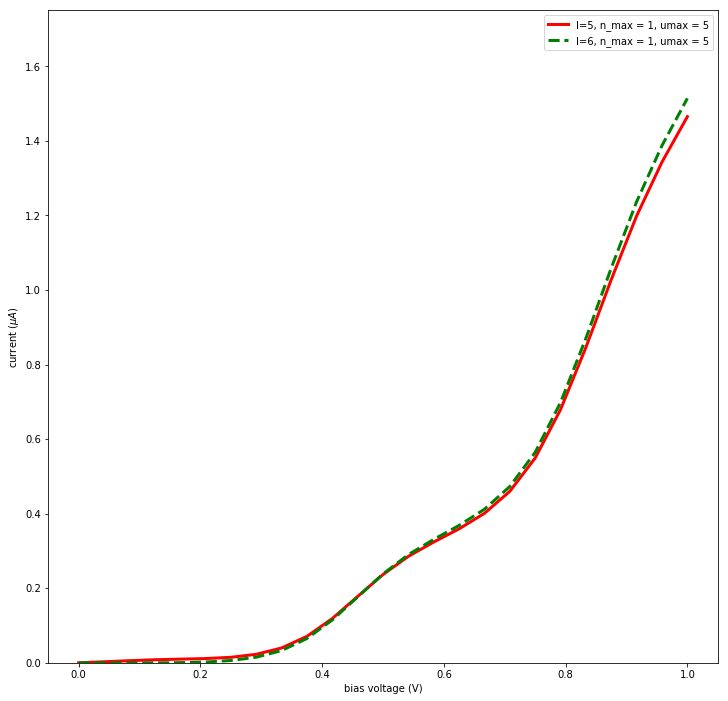

In [70]:


fig, ax1 = plt.subplots(figsize=(12, 12))


#ax1.plot(theta_list,currPunitsl5u2n2 , "b", linewidth=3, label= r"l=5, n_max = 2, umax = 2")
#ax1.plot(theta_list,currPunitsl6u2n2 , "g--", linewidth=3, label= r"l=6, n_max = 2, umax = 2")
#ax1.plot(theta_list,currPunitsl5u3n1 , "r--", linewidth=3, label= r"l=5, n_max = 1, umax = 5")
#ax1.plot(theta_list,currPunitsl5u5n1 , "r-", linewidth=3, label= r"l=5, n_max = 1, umax = 5")
#ax1.plot(theta_list,currPunitsl6u5n1 , "g--", linewidth=3, label= r"l=6, n_max = 1, umax = 5")
#ax1.plot(theta_list,currPunitsl7u5n1 , "b--", linewidth=3, label= r"l=7, n_max = 1, umax = 5")
#ax1.plot(theta_list,currPunitsl7u6n1 , "y--", linewidth=3, label= r"l=7, n_max = 1, umax = 6")
#ax1.plot(theta_list,currPunitsl7u10n1 , "r--", linewidth=3, label= r"l=7, n_max = 1, umax = 10")

ax1.plot(theta_list,currPunitsl9u10n1 , "r--", linewidth=3, label= r"l=7, n_max = 1, umax = 10")


ax1.set_xlabel("bias voltage (V)")
ax1.set_ylabel(r"current ($\mu A$)")
ax1.legend()
plt.ylim(0, 1.75)
#plt.savefig("fig1d_therm.pdf")

In [56]:
real(currPunitsl7u10n1)

array([0.00000000e+00, 3.10110968e-04, 7.00701630e-04, 1.23251853e-03,
       2.15953457e-03, 4.20093060e-03, 8.73359638e-03, 1.82590880e-02,
       3.71348644e-02, 7.09438816e-02, 1.22041051e-01, 1.84180228e-01,
       2.44901517e-01, 2.94964194e-01, 3.34598572e-01, 3.71402173e-01,
       4.15352568e-01, 4.77863175e-01, 5.72667480e-01, 7.10139508e-01,
       8.84935416e-01, 1.07338738e+00, 1.24782963e+00, 1.39369055e+00,
       1.51598084e+00])

In [59]:
1.05 - 0.2**2/0.2

0.85

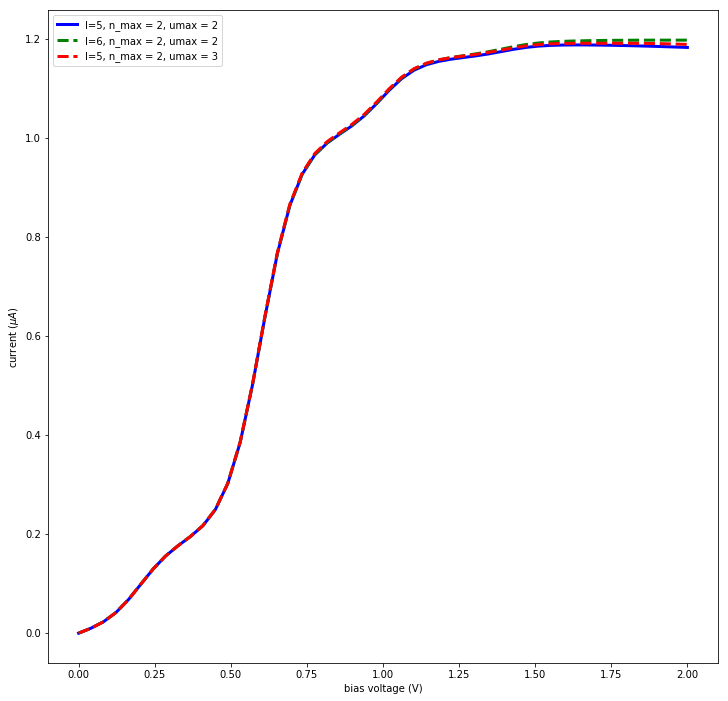

In [99]:


fig, ax1 = plt.subplots(figsize=(12, 12))


#ax1.plot(theta_list,currPunitsl5u2n2 , "b", linewidth=3, label= r"l=5, n_max = 2, umax = 2")
#ax1.plot(theta_list,currPunitsl6u2n2 , "g--", linewidth=3, label= r"l=6, n_max = 2, umax = 2")
#ax1.plot(theta_list,currPunitsl5u3n2 , "r--", linewidth=3, label= r"l=5, n_max = 2, umax = 3")


ax1.set_xlabel("bias voltage (V)")
ax1.set_ylabel(r"current ($\mu A$)")
ax1.legend()
plt.savefig("fig1a_therm.pdf")

In [101]:
currPunitsl6u2n2

[(7.455028348118953e-16-4.011201093501171e-15j),
 (0.010067911731160265+0.013527238486873344j),
 (0.022999063714545413+0.02704246064713258j),
 (0.04160462816253056+0.03964519412651141j),
 (0.06745654148161+0.048909541191739396j),
 (0.09865020181046319+0.05165114772971156j),
 (0.12971437429200947+0.04658689533863054j),
 (0.15585674097289803+0.03580109446552435j),
 (0.17661722290628656+0.022719342741680547j),
 (0.1952697681621246+0.009708447579213832j),
 (0.21715204406349753-0.0023232619618657317j),
 (0.24951176173444395-0.013308939154182917j),
 (0.3020494750279636-0.023489373759544768j),
 (0.3852053846768602-0.03316427309701996j),
 (0.5024044499341673-0.0426151343266072j),
 (0.639337063567185-0.05209919685214321j),
 (0.7672315167956665-0.06186723174274978j),
 (0.8642379244922072-0.07218752747483086j),
 (0.9276259007902583-0.0833678380182434j),
 (0.9662900529129983-0.0957611707325969j),
 (0.9905796532397004-0.10971582362010887j),
 (1.0084905957875263-0.12537513608320505j),
 (1.0257504118

In [102]:
theta_list

array([0.        , 0.04081633, 0.08163265, 0.12244898, 0.16326531,
       0.20408163, 0.24489796, 0.28571429, 0.32653061, 0.36734694,
       0.40816327, 0.44897959, 0.48979592, 0.53061224, 0.57142857,
       0.6122449 , 0.65306122, 0.69387755, 0.73469388, 0.7755102 ,
       0.81632653, 0.85714286, 0.89795918, 0.93877551, 0.97959184,
       1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
       1.2244898 , 1.26530612, 1.30612245, 1.34693878, 1.3877551 ,
       1.42857143, 1.46938776, 1.51020408, 1.55102041, 1.59183673,
       1.63265306, 1.67346939, 1.71428571, 1.75510204, 1.79591837,
       1.83673469, 1.87755102, 1.91836735, 1.95918367, 2.        ])

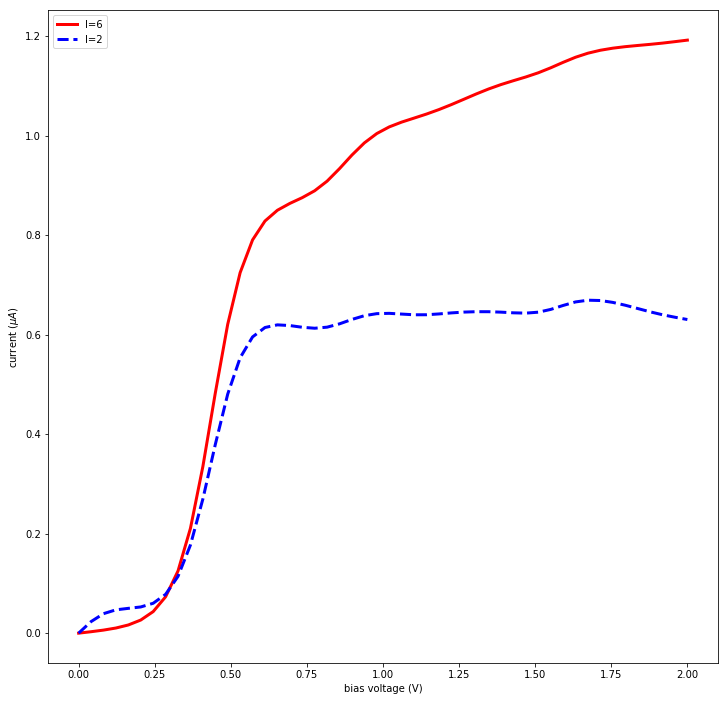

In [48]:


fig, ax1 = plt.subplots(figsize=(12, 12))

ax1.plot(theta_list,currPunits, "r-", linewidth=3, label= r"l=6")
ax1.plot(theta_list,currPunitsl2, "b--", linewidth=3, label= r"l=2")
    #ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
#ax1.set_ylim(0, 1)
ax1.set_xlabel("bias voltage (V)")
ax1.set_ylabel(r"current ($\mu A$)")
ax1.legend()

[[(25+0.010082277039975336j), -0.0002585199100170507j, -0.0002585199239757052j, -0.000258952047262851j, -0.00031445045986558325j, -0.0008616328627340188j, -0.008130201836120126j], [(25+0.010082277039975336j), -0.0002585199100170507j, -0.0002585199239757052j, -0.000258952047262851j, -0.00031445045986558325j, -0.0008616328627340188j, -0.008130201836120126j], [(25+0.010082277039975336j), -0.0002585199100170507j, -0.0002585199239757052j, -0.000258952047262851j, -0.00031445045986558325j, -0.0008616328627340188j, -0.008130201836120126j], [(25+0.010082277039975336j), -0.0002585199100170507j, -0.0002585199239757052j, -0.000258952047262851j, -0.00031445045986558325j, -0.0008616328627340188j, -0.008130201836120126j]]
[[(10000+1j), (0.08121642500626945+1j), (0.24364927558183513+1j), (0.40611723881168166+1j), (0.5776989051727179+1j), (0.8967641605723395+1j), (2.5805253138975073+1j)], [(10000-1j), (0.08121642500626945-1j), (0.24364927558183513-1j), (0.40611723881168166-1j), (0.5776989051727179-1j),

/home/neill/anaconda3/lib/python3.7/site-packages/scipy/sparse/compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


ss time 202.61168003082275


NameError: name 'out1P' is not defined

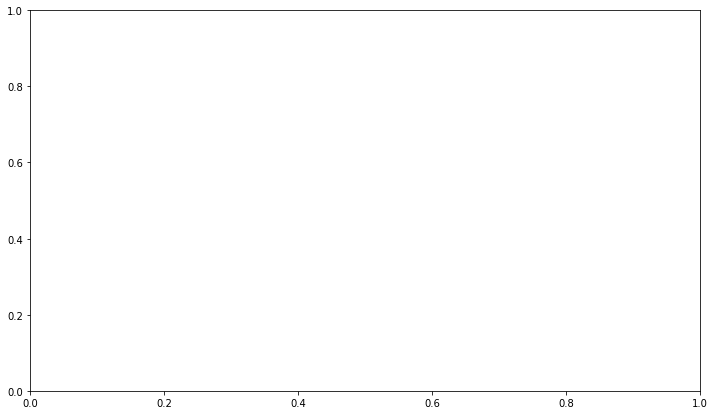

In [13]:
#heom simu on above params (Pade)

#try and do thos proper model

Nbos = 10

d1 = tensor(destroy(2), qeye(Nbos))

a = tensor(qeye(2), destroy(Nbos))

e1 = 0.3 #d1 = spin up
Omega = 0.2
Lambda = 0.12

H0 = e1*d1.dag()*d1 + Omega * a.dag()*a + Lambda * (a+a.dag())*d1.dag()*d1

#Qops = [d1,d1.dag()]
Qops = [d1.dag(),d1,d1.dag(),d1]


rho_0 = tensor(basis(2,0)*basis(2,0).dag(),basis(Nbos,0)*basis(Nbos,0).dag())

Kk=lmax+1
Ncc=2*2
Ncc=2*4
Ncc = 4*Kk
Ncc = 2
tlist = np.linspace(0,100,1000)


eta_list = [etapR,etamR,etapL,etamL]
#T=0:
#eta_list = [[Gamma*W/2.],[0.]]
#eta_list = [[0.],[Gamma*W/2.]]
print(eta_list)
gamma_list = [gampR,gammR,gampL,gammL]
print(gamma_list)
import time
start = time.time()
resultHEOM1=heom_fermions.HSolverFermions(H0, [], Qops,  eta_list, gamma_list,  Ncc, Kk,renorm=False,bnd_cut_approx=False)
end = time.time()
print("construct time:", end - start)

#start = time.time()
#out1P,full1P=resultHEOM1.run(rho_0,tlist)
#end = time.time()
#print(end - start)

start = time.time()

rhossHP,fullssP=resultHEOM1.ss(rho_0,H0)
end = time.time()
print("ss time",end - start)


#Pg1 = expect(out1.states,sz)
#Pgg1 = expect(out1.states,sm*sm.dag())
#1mev = 1.51926741 × 10^12 hertz 


#fig, ax1 = plt.subplots(figsize=(12, 7))

#ax1.plot(tlist,expect(out1P.states,basis(2,1)*basis(2,1).dag()), color="black", linewidth=3, label= r"up")
#ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
#ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
#ax1.set_ylim(0, 1)
#ax1.set_xlabel("t")
#ax1.set_ylabel(r"pop")
#ax1.legend()


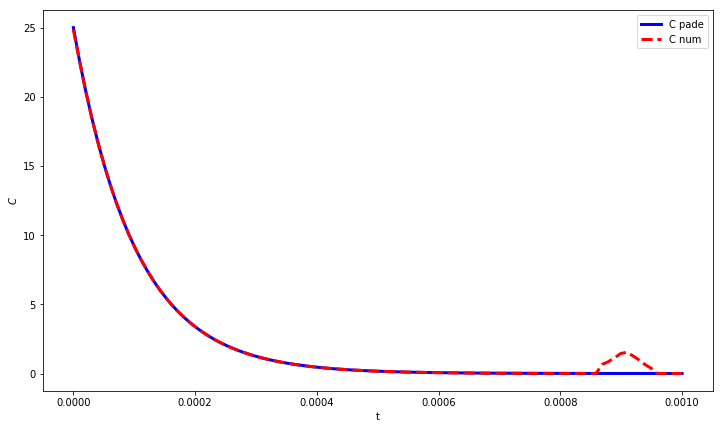

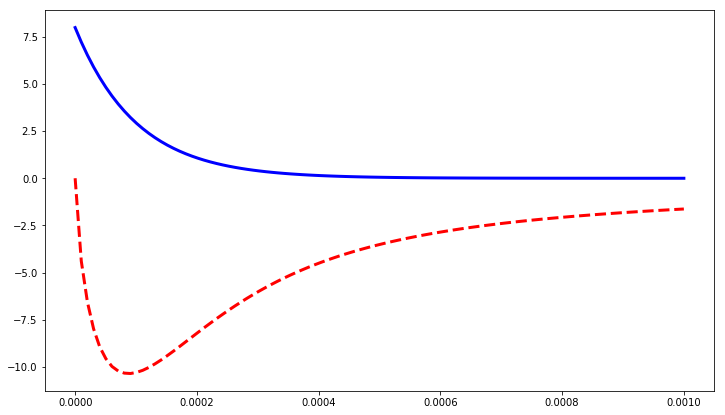

In [164]:
#asa comparison, this is matsubara
tlist = np.linspace(0,0.001,100)

#lmax = 1000000
#lmax = 1000000
lmax = 6
kappa = [0.]
kappa.extend([1. for l in range(1,lmax+1)])
epsilon = [0]
epsilon.extend([(2*l-1)*pi for l in range(1,lmax+1)])

def f_approx(x):
    f = 0.5
    for l in range(1,lmax+1):
        f= f - 2*kappa[l]*x/(x**2+epsilon[l]**2)
    return f

def C(tlist,sigma,mu):
    eta_list = []
    gamma_list  =[]
    
    #l = 0
    eta_0 = 0.5*Gamma*W*f(1.0j*beta*W)
    gamma_0 = W - sigma*1.0j*mu
    eta_list.append(eta_0)
    gamma_list.append(gamma_0)
    if lmax>0:
        for l in range(1,lmax+1):
            eta_list.append(-1.0j*(kappa[l]/beta)*Gamma*W**2/(-(epsilon[l]**2/beta**2)+W**2))
            gamma_list.append(epsilon[l]/beta - sigma*1.0j*mu)
    c_tot = []
    for t in tlist:
        c_tot.append(sum([eta_list[l]*exp(-gamma_list[l]*t) for l in range(lmax+1)]))
    return c_tot, eta_list, gamma_list

def c_t_L_num(t,sigma,mu):
    
    integrand = lambda w: (1/(2*pi))*exp(sigma*1.0j*w*t)*Gamma_w(w,mu)*f(sigma*beta*(w-mu))
    def real_func(x):
        return scipy.real(integrand(x))
    def imag_func(x):
        return scipy.imag(integrand(x))
    #return quad(integrand,-np.inf,np.inf)[0]
    #a= -600000
    #b = 600000

    a= -10**6
    b=10**6
    real_integral = quad(real_func, a, b)
    imag_integral = quad(imag_func, a, b)
    return real_integral[0] + 1.0j * imag_integral[0] 
 
#cp,eta,gam = C(tlist,1.0,mu_l)


cppL,etapL,gampL = C(tlist,1.0,mu_l)

cpmL,etamL,gammL = C(tlist,-1.0,mu_l)

#mu_r = -mu_l

cppR,etapR,gampR = C(tlist,1.0,mu_r)

cpmR,etamR,gammR = C(tlist,-1.0,mu_r)


c_num =[c_t_L_num(t,1.0,mu_l) for t in tlist]


fig, ax1 = plt.subplots(figsize=(12, 7))
#print(gam_list)
ax1.plot(tlist,real(cppL), color="b", linewidth=3, label= r"C pade")
ax1.plot(tlist,real(c_num), "r--", linewidth=3, label= r"C num")


ax1.set_xlabel("t")
ax1.set_ylabel(r"$C$")
ax1.legend()
fig, ax1 = plt.subplots(figsize=(12, 7))
#print(gam_list)
ax1.plot(tlist,imag(cppL), color="b", linewidth=3, label= r"C pade")
ax1.plot(tlist,imag(c_num), "r--", linewidth=3, label= r"C num")


(0.00875448693086689+0j)


[[(25+7.981505797494913j), -0.00025851991001705224j, -0.0002585199101534703j, -0.0002585199104263063j, -0.0002585199108355603j, -0.00025851991138123244j, -0.0002585199120633225j, -0.0002585199128818306j], [(25+7.981505797494913j), -0.00025851991001705224j, -0.0002585199101534703j, -0.0002585199104263063j, -0.0002585199108355603j, -0.00025851991138123244j, -0.0002585199120633225j, -0.0002585199128818306j], [(25+7.981505797494913j), -0.00025851991001705224j, -0.0002585199101534703j, -0.0002585199104263063j, -0.0002585199108355603j, -0.00025851991138123244j, -0.0002585199120633225j, -0.0002585199128818306j], [(25+7.981505797494913j), -0.00025851991001705224j, -0.0002585199101534703j, -0.0002585199104263063j, -0.0002585199108355603j, -0.00025851991138123244j, -0.0002585199120633225j, -0.0002585199128818306j]]
[[(10000+1j), (0.08121642500626945+1j), (0.24364927501880834+1j), (0.4060821250313473+1j), (0.5685149750438862+1j), (0.7309478250564251+1j), (0.8933806750689639+1j), (1.05581352508150

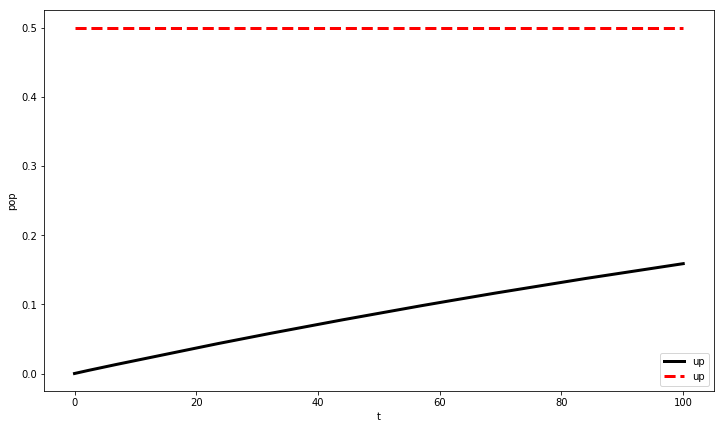

In [165]:
#heom simu on above params (Matsubara)


d1 = destroy(2)

e1 = 1. #d1 = spin up


H0 = e1*d1.dag()*d1 

#Qops = [d1,d1.dag()]
Qops = [d1.dag(),d1,d1.dag(),d1]


rho_0 = basis(2,0)*basis(2,0).dag()

Kk=lmax+1
Ncc=2*2
Ncc=2*4
Ncc = 4*Kk
Ncc = 4*Kk 
Ncc = 2
tlist = np.linspace(0,100,1000)


eta_list = [etapR,etamR,etapL,etamL]
#T=0:
#eta_list = [[Gamma*W/2.],[0.]]
#eta_list = [[0.],[Gamma*W/2.]]
print(eta_list)
gamma_list = [gampR,gammR,gampL,gammL]
print(gamma_list)
import time
start = time.time()
resultHEOM1=heom_fermions.HSolverFermions(H0, [], Qops,  eta_list, gamma_list,  Ncc, Kk,renorm=False,bnd_cut_approx=False)
end = time.time()
print(end - start)

start = time.time()
#out1M,full1M=resultHEOM1.run(rho_0,tlist)
end = time.time()
print(end - start)

start = time.time()

rhossHM,fullssM=resultHEOM1.ss(rho_0,H0)
end = time.time()
print(end - start)


#Pg1 = expect(out1.states,sz)
#Pgg1 = expect(out1.states,sm*sm.dag())
#1mev = 1.51926741 × 10^12 hertz 
fig, ax1 = plt.subplots(figsize=(12, 7))
#
ax1.plot(tlist,expect(out1M.states,basis(2,1)*basis(2,1).dag()), color="black", linewidth=3, label= r"up")
#ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
#ax1.set_ylim(0, 1)
ax1.set_xlabel("t")
ax1.set_ylabel(r"pop")
ax1.legend()


(0.002492000620502373+0j)


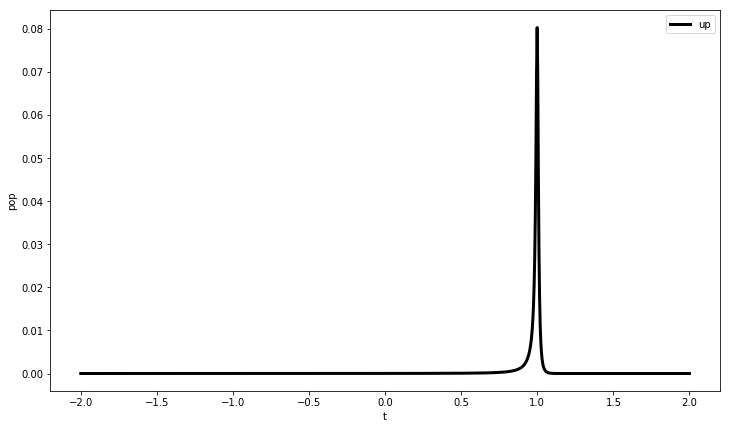

In [166]:
#note that at the moment by model is different from phillips:   w_o_r = mu_r in mine, but w_o_r = eps in phillips. fuck.

def CurrFunc():
    def lamshift(w,mu):
        return (w-mu)*Gamma_w(w,mu)/(2*W)
    integrand = lambda w: ((2/(pi))*Gamma_w(w,mu_l)*Gamma_w(w,mu_r)*(f(beta*(w-mu_l))-f(beta*(w-mu_r))) /
            ((Gamma_w(w,mu_l)+Gamma_w(w,mu_r))**2 +4*(w-e1 - lamshift(w,mu_l)-lamshift(w,mu_r))**2))
    def real_func(x):
        return scipy.real(integrand(x))
    def imag_func(x):
        return scipy.imag(integrand(x))
    #return quad(integrand,-np.inf,np.inf)[0]
    #a= -600000
    #b = 600000
    
    a= -2
    b=2
    real_integral = quad(real_func, a, b)
    imag_integral = quad(imag_func, a, b)
    fig, ax1 = plt.subplots(figsize=(12, 7))
#
    wlist2 = linspace(a,b,1000)
    ax1.plot(wlist2,[real_func(w) for w in wlist2], color="black", linewidth=3, label= r"up")
    
    
    #ax1.set_ylim(0, 1)
    ax1.set_xlabel("t")
    ax1.set_ylabel(r"pop")
    ax1.legend()

    return real_integral[0] + 1.0j * imag_integral[0]
    
curr_ana = CurrFunc()
print(curr_ana)

In [14]:
#I need to generelize this a b it better

aux_1_list_list=[]
aux1_indices_list=[]
aux_2_list_list=[]
aux2_indices_list=[]

#for kk,lam in enumerate(lamlist):
K = Kk  #this is not kk (Ihope)


#aux_1_list, aux1_indices = get_aux_matrices([fullss], 1, 4, K)
#aux_2_list, aux2_indices = get_aux_matrices([fullss], 2, 4, K)

aux_1_list, aux1_indices, idx2state = get_aux_matrices([fullssP], 1, 4, K, Ncc)
aux_2_list, aux2_indices, idx2state = get_aux_matrices([fullssP], 2, 4, K, Ncc)


d1 = destroy(2)   #Kk to 2*Kk
#currP = [0.0]+[-1.0j * ((d1*(sum([aux_1_list[gg][t] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][t] for gg in range(Kk)]))).tr()) for t in range(999)]
currP = -1.0j * ((d1*(sum([aux_1_list[gg][0] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][0] for gg in range(Kk)]))).tr())

ValueError: cannot reshape array of size 400 into shape (2,2)

In [168]:
#I need to generelize this a b it better

aux_1_list_list=[]
aux1_indices_list=[]
aux_2_list_list=[]
aux2_indices_list=[]

#for kk,lam in enumerate(lamlist):
K = Kk  #this is not kk (Ihope)


#aux_1_list, aux1_indices = get_aux_matrices([fullss], 1, 4, K)
#aux_2_list, aux2_indices = get_aux_matrices([fullss], 2, 4, K)

aux_1_list, aux1_indices, idx2state = get_aux_matrices([fullssM], 1, 4, K, Ncc)
aux_2_list, aux2_indices, idx2state = get_aux_matrices([fullssM], 2, 4, K, Ncc)


d1 = destroy(2)   #Kk to 2*Kk
#currM = [0.0]+[-1.0j * ((d1*(sum([aux_1_list[gg][t] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][t] for gg in range(Kk)]))).tr()) for t in range(999)]
currM = -1.0j * ((d1*(sum([aux_1_list[gg][0] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][0] for gg in range(Kk)]))).tr())

In [169]:
#lmax 7 ncc=3
print(-currP)
print(-currM)
print(curr_ana)

(0.0024676236870977523-0j)
(0.0008208724731238981+8.673617379884035e-19j)
(0.002492000620502373+0j)


In [152]:
#lmax 7 ncc=1? i am not sure
print(-currP)
print(-currM)
print(curr_ana)

(0.00019337167825506584-3.903127820947816e-18j)
(0.0001288010061298957-4.336808689942018e-19j)
(0.002492000620502373+0j)


In [144]:
#lmax 1 I think....

print(-currP)
print(-currM)
print(curr_ana)

(0.00019337167825506514-1.734723475976807e-18j)
(0.0001288010061298974+4.336808689942018e-18j)
(0.002492000620502373+0j)


In [ ]:
#note for the future... i need 3 exponents in both pade and matsubara to get analytical solution upto 0.00875 (3 sig figs?)
#P is one sig fig better (mats gives 876)

In [137]:
#7 matsubara terms result, Ncc = 4
print(-currP)
print(-currM)
print(curr_ana)

(0.0024676236870977966+6.418476861114186e-17j)
(0.000820872473123897+3.469446951953614e-18j)
(0.002492000620502373+0j)
